#         Exploratory Data Analysis Pt. 1 (Data Cleaning)

## Background

**Katie:**

For this project we are going to build a model to estimate the delivery time for a door dash model

This delivery time is given by the seconds from 

    Start: the time consumer submits the order (created_at)
    to
    End: when the order will be delivered to the consumer (actual_delivery_time)


#### Data Set
Time Features
- market_id: A city/region in which DoorDash operates
- created_at: Timestamp in UTC when the order was submitted by the consumer to DoorDash. 
- actual_delivery_time: Timestamp in UTC when the order was delivered to the consumer


Store Features
- store_id: an id representing the restaurant the order was submitted for
- store_primary_category: cuisine category of the restaurant
- order_protocol: id of the order mode associated with the order


Order Features
- total_items: total number of items in the order
- subtotal: total value of the order submitted (in cents)
- num_distinct_items: number of distinct items included in the order
- min_item_price: price of the item with the least cost in the order (in cents)
- max_item_price: price of the item with the highest cost in the order (in cents)


Market Features
- total_onshift_dashers: Number of available dashers who are within 10 miles of the store at the time of order creation
- total_busy_dashers: Subset of above total_onshift_dashers who are currently working on an order
- total_outstanding_orders: Number of orders within 10 miles of this order that are currently being processed.


Prediction from other models
- estimated_order_place_duration: Estimated time for the restaurant to receive the order from DoorDash (in seconds)
- estimated_store_to_consumer_driving_duration: Estimated travel time between store and consumer (in seconds)


## Data Cleaning

**Azra:**

Cleaning our data is argueably the most important step in a data science project, as it serves as the foundaiton for all future analysis and model building. In other words, our conclusions can only be as good as our data.


Bad Data = Bad Conclusions


#### Possible Data Issues:
- invalid data (human error, impossible values)
- misformatting
- redundancy (unecessary rows or cols)
- missing values
- irrelevancy
- incompatible data types (non-numerical, string dates)


#### Things to Remember:

1. Data cleaning is not a cookie-cutter process. You have to think about why the data has certain issues in order to properly clean it. 

2. Keep in mind the problem you are trying to solve, as it will influence your decision making.
    
3. In a real project sceanrio, you shouldn't make changes directly to your data without first making a copy to check that those are the changes you want. However, for the sake of time, we are going to skip this step in this workshop

## Set Up

MUST INCLUDE SECTION ON HOW TO INSTALL PANDAS

In [1]:
import pandas as pd

historical_df = pd.read_csv('historical_data.csv')

## Examining our Data

Whenever we have data, the first thing we want to do is to take a quick look at a few of our rows, which we can do using the .head() function

In [2]:
historical_df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


To get more information about our data set, we can use the .info() function, paying special attention to the types, Non-Null Count, and the number of entries

In [3]:
historical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

We can see from the above output that we have some null values in our data set and some columns of type object, both of which we will deal with later.

In order to see the distribution of all the numerical type columns, we can use the .describe() function

In [4]:
historical_df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


Skimming through the output, most of it looks reasonable until we get to the negative values for min_item_price, total_onshift_dashers, total_busy_dashers, and total_outstanding_orders.

## Cleaning Invalid Values

**Katie:**

These values are a case of invalid data, as it doesn't make sense for any of these values to be less than 0. Leaving these values as they are might cause us to reach some false conclusions, so fixing invalid data is an important step in the data cleaning process.

First we are going to adress the issue of negative min_item_prices/ In order to do so, however, we first need to learn some pandas tool

#### Indexing
    To access a specific column of a dataframe
        dataframe['column_name']


#### Filtering
    To specify what rows you want to isolate
        filter_variable = dataframe['column_name'] <,>,== some value


#### Locating
    to locate specific columns from rows that conform to the filter
        new_dataframe = dataframe.loc[filter, 'column_names']


#### Assigning
    dataframe['column_name'] = new column
    
    dataframe.loc[filter, 'column_names'] = some value



We can use what we just learned to filter just the rows with negative min_item_price values. Looking at these rows we can try and answer the very important question, why are some min_item_prices negative.

In [5]:
invalid_min_filt = historical_df['min_item_price'] < 0
invalid_min_df = historical_df.loc[invalid_min_filt ]
invalid_min_df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
790,1.0,2015-01-29 02:59:28,2015-01-29 03:44:09,132,fast,4.0,3,1003,3,-86,1066,24.0,29.0,38.0,251,721.0
1351,2.0,2015-02-06 05:26:55,2015-02-06 06:15:41,6740,fast,4.0,35,1786,4,-1,488,33.0,36.0,52.0,251,587.0
46369,2.0,2015-02-08 23:20:59,2015-02-08 23:50:03,777,fast,4.0,25,1636,5,-35,514,81.0,61.0,72.0,251,469.0
46378,2.0,2015-02-08 06:02:12,2015-02-08 06:32:58,777,fast,4.0,15,1822,4,-48,433,36.0,36.0,43.0,251,339.0
77238,5.0,2015-02-14 22:01:48,2015-02-14 23:15:15,2276,pizza,3.0,1,3099,1,-31,52,22.0,26.0,34.0,251,377.0


Looking at the rows, in this case, the data doesn't give us any clear idea about why these min_item_prices are negative.

Row 5 in particular is confusing as we have an order with only 1 item, with a min_item_price different from the max item price. Taking the absolute value of the min_item_price doesn't make much sense given row 5, and neither does replacing the negative min_item_price cells with 0.  

We now have to make an important decision. Do we drop these rows with negative min_item_prices, or do attempt to replace the negative values. The pro's and cons of each approach are summarized below.


#### Dropping Invalid/Missing Values
    Pro: You don't run the risk of introducing bad data by filling in values
    Con: You have less data to work with and might skew your data set

#### Filling in Invalid/Missing Values in a row or column
    Pro: You  preserve the remaining non-null information in that row or column
    Con: Can introduce bad data and lead to bad conclusions


Given the very large size of this data set compared to the number of negative min_item_price values(1352, found by using .size on the filtered table), and the fact that we don't **really** know why these values are negative, in a real life scenario we would probably drop these invalid rows. However, for the purposes of this workshop, we are going to fill in these values with the median in order to demonstrate a common method of filling in invalid or missing data.

We start this process by getting the median of the non-negative values of min_item_price.

In [6]:
non_neg_min_df = historical_df.loc[~invalid_min_filt , 'min_item_price']
min_median = non_neg_min_df.median()

Now we can use an opposite filter to find all the negative min values in our data frame and set those values equal to our min_median. Then we will check its affect using describe()

In [7]:
#you can get the opposite of any filter by putting a ~ before it
historical_df.loc[invalid_min_filt] = min_median
historical_df['min_item_price'].describe()

count    197428.000000
mean        686.259583
std         522.006838
min           0.000000
25%         299.000000
50%         595.000000
75%         949.000000
max       14700.000000
Name: min_item_price, dtype: float64

Next we are going to look at some of the rows with negative total_onshift_dashers, total_busy_dashers, or total_oustanding_orders and look for any patterns.

In [8]:
invalid_onsh_filt = historical_df['total_onshift_dashers'] < 0
invalid_busy_filt = historical_df['total_busy_dashers'] < 0
invalid_outor_filt = historical_df['total_outstanding_orders'] < 0

invalid_dash_df = historical_df.loc[(invalid_onsh_filt | invalid_busy_filt | invalid_outor_filt)]
invalid_dash_df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
4989,1.0,2015-02-18 00:36:21,2015-02-18 01:12:28,1811,smoothie,2.0,2,1940,1,840,856,11.0,14.0,-2.0,251,460.0
6034,3.0,2015-02-14 01:48:58,2015-02-14 03:00:13,90,american,1.0,2,3538,2,1238,1606,-2.0,2.0,10.0,446,266.0
7997,1.0,2015-02-08 15:41:45,2015-02-08 16:35:01,6172,sandwich,3.0,1,1514,1,1116,1063,1.0,-1.0,3.0,251,650.0
12888,3.0,2015-01-21 21:02:32,2015-01-21 21:41:03,2649,catering,2.0,1,986,1,892,827,-2.0,5.0,1.0,251,787.0
19438,3.0,2015-02-03 03:04:22,2015-02-03 04:21:43,275,fast,4.0,3,1778,2,158,869,7.0,10.0,-2.0,251,743.0


Looking at the table there are several instances in which the total_onshift_dashers values is less than the total_busy_dashers, even though total_busy_dashers is a subset of total_onshift_dashers. This still applies even if we were to take the absolute value of both rows. Given this nonsensical manner of the relationship between negative values in these 3 columns, we are going to move forward with dropping the rows with null values in total_onshift_dashers, total_busy_dashers, or total_outstanding_orders.

In [9]:
invalid_dash_df.size

1296

Checking the number, it is relatively small compared to the almost 200,000 rows in our data set, so we will go ahead and drop them

In [10]:
historical_df.drop(invalid_dash_df.index, inplace = True)

Now if we look at our the minimum values in these columns again, we see that the mins are now 0, meanign we have successfully eliminated the negative values

In [11]:
historical_df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196360.000000,197347.000000,196352.000000,197347.000000,197347.000000,197347.000000,197347.000000,197347.000000,181086.000000,181086.000000,181086.000000,197347.000000,196822.000000
mean,3.018329,3530.456632,2.921610,3.234800,2682.272317,2.709785,686.226758,1159.591704,44.866080,41.796837,58.114984,308.564964,545.359569
std,5.052495,2053.553402,5.047002,5.492494,1823.227624,5.076219,521.950189,558.382968,34.836828,32.482611,52.855621,90.160988,219.342268
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,595.000000,6987.000000,595.000000,595.000000,27100.000000,595.000000,14700.000000,14700.000000,595.000000,595.000000,595.000000,2715.000000,2088.000000


## Handling Missing Data

**Azra:**

Now we come to the issue of missing data in our data frame. We can see where there are holes in our datas set using the .isna() function and the .sum() function

In [12]:
historical_df.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4758
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16261
total_busy_dashers                              16261
total_outstanding_orders                        16261
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      525
dtype: int64

We are going to start by filling in all the missing values that can be directly gathered from the remaining values in our table.

From the above output, we see that every row has a store_id. Additionally, assuming a store doesn't change location, it will always have the same market_id. Thus, if there is a row 'A' with a missing market id, and there is another row 'B' with a matching store id and a market_id, we can fill row 'A's market_id with row 'B's market_id. We can do this using a dictionary, which will use our filled in rows to map each store_id to a market_id. (shown below) We can then use this dictionary to fill in our missing market_id values.

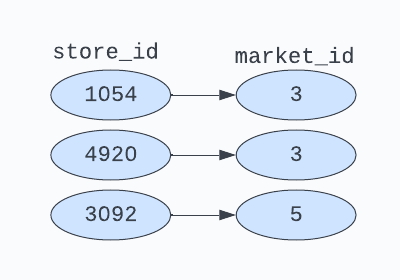

__[creating a dictionary tutorial](https://saturncloud.io/blog/how-to-create-a-dictionary-of-two-pandas-dataframe-columns/)__

__[using a dictionary to fill in missing values](https://www.statology.org/pandas-fillna-dictionary/#:~:text=You%20can%20use%20the%20fillna,on%20values%20in%20another%20column.)__

In [13]:
#filters all the rows with a missing market
missing_market_filter = historical_df['market_id'].isna() 

#data frame of just the market_id and store_id columns
location_df = historical_df[['market_id', 'store_id']]

#dictionary based on the location_df that maps each store_id to its market
location_dict = location_df.set_index('store_id')['market_id'].to_dict()

#fills in all the missing market values in historical_df based on the location_dict
#store this modified 'market_id' column in temp_market
historical_df['market_id'] = historical_df['market_id'].fillna(historical_df['store_id'].map(location_dict))

#find the number of remaining null values in temp_market
historical_df['market_id'].isna().sum()

38

After doing this, we see that there are only 38 null values remaining in the market_id column.

We can now repeat a similar process with the missing values in store_primary_category

In [14]:
type_df = historical_df[['store_id', 'store_primary_category']]
type_dict = type_df.set_index('store_id')['store_primary_category'].to_dict()
historical_df['store_primary_category'] = historical_df['store_primary_category'].fillna(historical_df['store_id'].map(type_dict))
historical_df['store_primary_category'].isna().sum()

3329

We can likewise create a dictionary with store_id and order protocol. However, there are not only 1 type of order_protocol per store id, so we can map each store_id to its most common order_protocol.

In [15]:
order_df = historical_df[['store_id', 'order_protocol']]
order_dict = dict()

for location in historical_df['store_id'].unique():
    location_filter = historical_df['store_id'] == location
    store_series = historical_df.loc[location_filter,'order_protocol']
    
    mode_series = store_series.mode()
    if(mode_series.size >= 1):
        order_dict[location] = mode_series[0]
    else:
        order_dict[location] = None

historical_df['order_protocol'] = historical_df['order_protocol'].fillna(historical_df['store_id'].map(order_dict))
historical_df[ 'order_protocol'].isna().sum()

3

## Data Types

**Katie:**

Many machine learning models can only take in numerical data (int, float, double), meaning we must find a way to transfer all of our object types, whether quantitative or qualitiative, into numerical data

### Type Conversion

We can change our object type date data into datetime objects using the datetime class

In [16]:
from datetime import datetime

#converting created_at and actual_delivery_time columns to datetime
#errors = coerce specifies that all misformatted data should be set to NA
historical_df['created_at'] = pd.to_datetime(historical_df['created_at'], errors = 'coerce')
historical_df['actual_delivery_time'] = pd.to_datetime(historical_df['actual_delivery_time'], errors = 'coerce')
historical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197347 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     197309 non-null  float64       
 1   created_at                                    197334 non-null  datetime64[ns]
 2   actual_delivery_time                          197327 non-null  datetime64[ns]
 3   store_id                                      197347 non-null  int64         
 4   store_primary_category                        194018 non-null  object        
 5   order_protocol                                197344 non-null  float64       
 6   total_items                                   197347 non-null  int64         
 7   subtotal                                      197347 non-null  int64         
 8   num_distinct_items                            197347 non-nu

We can now see the the date columns are now type datetime64 instead of objects. Though datetime64 is not technically a numerical type, these columns will later be used to cacluate the numerical time in seconds of delivery in a future step. The purpose of the conversion to datetime was to make this process easier. We also see though, that we now have some null values in our datetime columns, as any invalid data times were transformed into nulls.

Finally we can drop any rows with remaining null values. For some of the rows that we did not address, these are the reason we will drop rows that are missing them:

- actual_delivery_time: missing this value means that this row can not train our model on delivery time
- estimated_store_to_consumer_driving_duration: Tools beyond the scope of this workshop would be necessary to fill in these values, and even then, there might be more bad data added to our data set than it is worth

In [17]:
#drops rows with ANY missing values
historical_df.dropna(axis = 'index', how = 'any', inplace = True)

### One-Hot Encoding

To handle our categorical variables, including market_id, store_id, primary-category_ and order_protocol, we will use a process called __[one-hot encoding](https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/)__. You might argue that some of these categorical variables already have a numerical type such as int or float. However, simply assigning numbers like 1102, 2, or 349 can cause issues for some machine learning models, as they may assign significance to the actual numerical value. Thus, we should instead use one-hot encoding to translate these categories to binary variables, where we now have a column for each possible value of a category, and each row indicates whether it fits that category (true = 1) or it doesn't (false = 0).

For example, if we wanted to convert the variable color that can take on the values red, blue, or green, with index 1 = red, 2 = green, 3 = blue, we would convert this into the following 


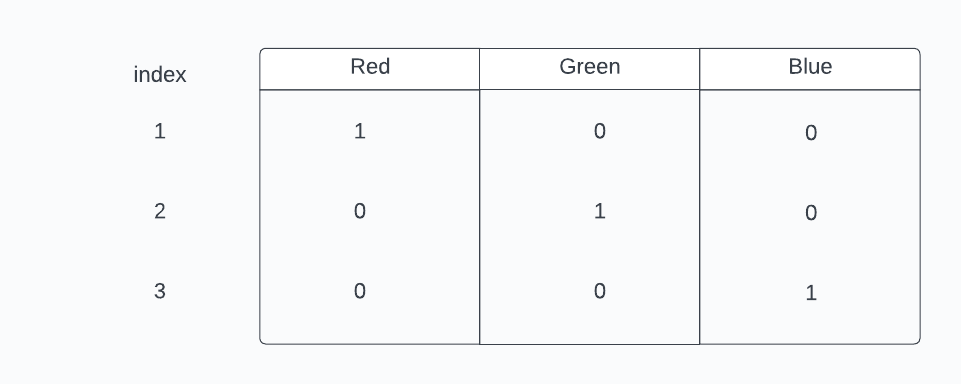


Before converting our variables, we want to take a look at the number of unqiue categories for each variable using the nunique() function


In [18]:
historical_df['market_id'].nunique()

6

In [19]:
historical_df['store_id'].nunique()

5644

In [20]:
historical_df['store_primary_category'].nunique()

73

In [21]:
historical_df['order_protocol'].nunique()

7

All these categorical variables except for store_id have a relatively low number of possible values except for store_id. In order to one-hot encode store_id, we would have to add an additional 5644 columns, which is a lot, so we are going to opt to drop store_id from our table and instead hot encode the remaining columns

The reason we don't want to add so many columns is that the more variables we add to our model, the more data points are necessary to understand the very complicated relationships bewteen those variables and our dependent variable (delivery time). Thus, adding too many variables or insigificant variables can actually make our model weaker.

In [22]:
historical_df.drop(columns = 'store_id', inplace = True)

In [23]:
# create binary encoded columns for order protocol
order_protocol_dummies = pd.get_dummies(historical_df.order_protocol)

#add prefixes to column titles
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')

order_protocol_dummies.head()

,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,True,False,False,False,False,False,False
1,False,True,False,False,False,False,False
8,False,False,True,False,False,False,False
14,True,False,False,False,False,False,False
15,True,False,False,False,False,False,False


In [24]:
market_id_dummies = pd.get_dummies(historical_df.market_id)
market_id_dummies = market_id_dummies.add_prefix('market_id_')
market_id_dummies.head()

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,True,False,False,False,False,False
1,False,True,False,False,False,False
8,False,True,False,False,False,False
14,True,False,False,False,False,False
15,True,False,False,False,False,False


In [25]:
store_primary_category_dummies = pd.get_dummies(historical_df.store_primary_category)
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category_')
store_primary_category_dummies.head()

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
#add the new one-hot encoded columns to the historical df
historical_df = pd.concat([historical_df, order_protocol_dummies, market_id_dummies, store_primary_category_dummies], axis = 1)

#drop the categorical variables that we have replaced with one-hot encoded columns
historical_df.drop(columns = ['store_primary_category', 'order_protocol', 'market_id'])


,created_at,actual_delivery_time,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,2015-02-06 22:24:17,2015-02-06 23:27:16,4,3441,4,557,1239,33.0,14.0,21.0,...,False,False,False,False,False,False,False,False,False,False
1,2015-02-10 21:49:25,2015-02-10 22:56:29,1,1900,1,1400,1400,1.0,2.0,2.0,...,False,False,False,False,False,False,False,False,False,False
8,2015-02-16 00:11:35,2015-02-16 00:38:01,4,4771,3,820,1604,8.0,6.0,18.0,...,False,False,False,False,False,False,False,False,False,False
14,2015-02-12 03:36:46,2015-02-12 04:14:39,1,1525,1,1525,1525,5.0,6.0,8.0,...,False,False,False,False,False,False,False,False,False,False
15,2015-01-27 02:12:36,2015-01-27 03:02:24,2,3620,2,1425,2195,5.0,5.0,7.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,2015-02-17 00:19:41,2015-02-17 01:24:48,3,1389,3,345,649,17.0,17.0,23.0,...,False,False,False,False,False,False,False,False,False,False
197424,2015-02-13 00:01:59,2015-02-13 00:58:22,6,3010,4,405,825,12.0,11.0,14.0,...,False,False,False,False,False,False,False,False,False,False
197425,2015-01-24 04:46:08,2015-01-24 05:36:16,5,1836,3,300,399,39.0,41.0,40.0,...,False,False,False,False,False,False,False,False,False,False
197426,2015-02-01 18:18:15,2015-02-01 19:23:22,1,1175,1,535,535,7.0,7.0,12.0,...,False,False,False,False,False,False,False,False,False,False


## Wrap-Up and Next Steps


**Azra:**

This concludes our data cleaning portion of our workshop series. However, there are many more topics in data cleaning that we haven't thoroughly explored in this walkthrough, so below are more resources. We encourage you to explore these resources and expand upon the data cleaning we did in this workshop, exploring different approaches.

- __[Types of missing data](https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values)__
- __[Data Issues and Tools](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4)__

If you want further support or to collaborate on this project, check out Data@UCI's discord server